In [2]:
import pandas as pd
file_path = "data/noemoticon_with_header.csv"
df = pd.read_csv(file_path, encoding="latin1")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1599999 non-null  int64 
 1   text      1599999 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None


In [4]:
from textpreprocesshelper import TextPreprocessHelper, NumberProcessor
helper  = TextPreprocessHelper()

### remove useless informaiton


    Additional: support remove @someone and email address
    Purpose: improve generalization, dimensionality reduction
    ✅ Improve text consistency
    ✅ Enhance model robustness
    ✅ Reduce noise in data
    ✅ Optimize feature extraction
    ✅ Improve computational efficiency
    ✅ Facilitate better text clustering & classification

    🚀 Overall Goal: Standardize text for improved NLP performance.


In [5]:
##removing HTML and brackets.
df["text"] = df["text"].apply(helper.denoise_text)

#Expands abbreviations, e.g. "can't" → "cannot", "I'm" → "I am"
df["text"] = df["text"].apply(helper.expand_contractions)

#Remove @someone and email addresses from text
df["text"] = df["text"].apply(helper.remove_mentions_and_emails)

#apply futher
df["text"] = df["text"].apply(helper.remove_non_ascii_in_text)

c:\Users\Zhou&Wan\Documents\GitHub\Text-Mining\groupproject\textpreprocesshelper.py:28: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


###Review dataset

C:\temp\ipykernel_12092\3091190073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["word_count"] = df["text"].astype(str).apply(lambda x: len(x.split()))


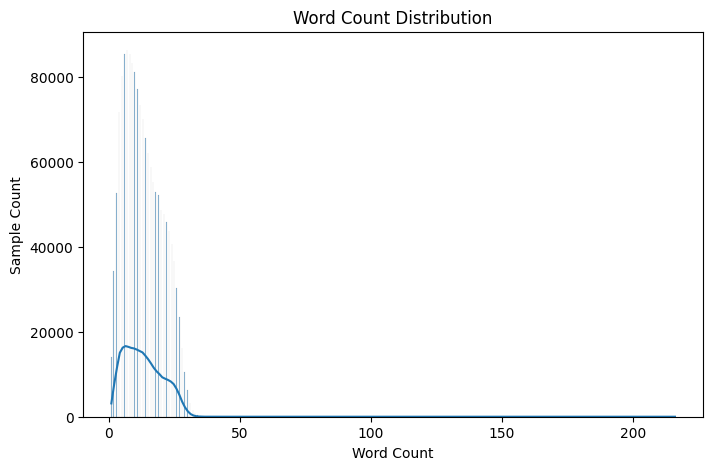


Word Count Statistics:
count    1.597267e+06
mean     1.317816e+01
std      7.227190e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      1.900000e+01
max      2.160000e+02
Name: word_count, dtype: float64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

df["word_count"] = df["text"].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df["word_count"], kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Sample Count")
plt.show()

print("\nWord Count Statistics:")
print(df["word_count"].describe())

#这个图表示的是数据集中每条文本（text）的单词数量分布情况
#This graph shows the distribution of the number of words in each text in the dataset.

In [14]:
df = df.drop("word_count", axis=1) 
df = df[df["text"].str.strip().notna() & (df["text"].str.strip() != "")] ##remove empty string

train_file_path = "data/noemoticon_preprocessed.csv"
df.to_csv(train_file_path, index=False, encoding="utf-8")

### analyse frequency words

In [8]:
from nltk.tokenize import word_tokenize
df["tokens"] = df["text"].apply(word_tokenize) #word_tokenize is better than just split, use it directly

In [9]:
from collections import Counter
counter = Counter()
for tokens in df["tokens"]:  
    counter.update(tokens)

In [10]:
def check_low_high_frequence_words(low_freq_threshold) :
    low_freq_words = [word for word, freq in counter.items() if freq <= low_freq_threshold]
    print(f"Total unique words: {len(counter)}")
    print(f"Words appearing ≤ {low_freq_threshold} times: {len(low_freq_words)}")
    high_freq_words = len(counter) - len(low_freq_words)
    print(f"Words appearing > {low_freq_threshold} times: {high_freq_words}")
    print(f"Percentage of low-frequency words: {len(low_freq_words) / len(counter) * 100:.2f}%")

In [11]:
check_low_high_frequence_words(2)

Total unique words: 424357
Words appearing ≤ 2 times: 339142
Words appearing > 2 times: 85215
Percentage of low-frequency words: 79.92%


In [12]:
check_low_high_frequence_words(3)

Total unique words: 424357
Words appearing ≤ 3 times: 356974
Words appearing > 3 times: 67383
Percentage of low-frequency words: 84.12%


In [13]:
check_low_high_frequence_words(5)

Total unique words: 424357
Words appearing ≤ 5 times: 374366
Words appearing > 5 times: 49991
Percentage of low-frequency words: 88.22%


In [14]:
check_low_high_frequence_words(10)

Total unique words: 424357
Words appearing ≤ 10 times: 390978
Words appearing > 10 times: 33379
Percentage of low-frequency words: 92.13%


In [15]:
check_low_high_frequence_words(20)

Total unique words: 424357
Words appearing ≤ 20 times: 402094
Words appearing > 20 times: 22263
Percentage of low-frequency words: 94.75%


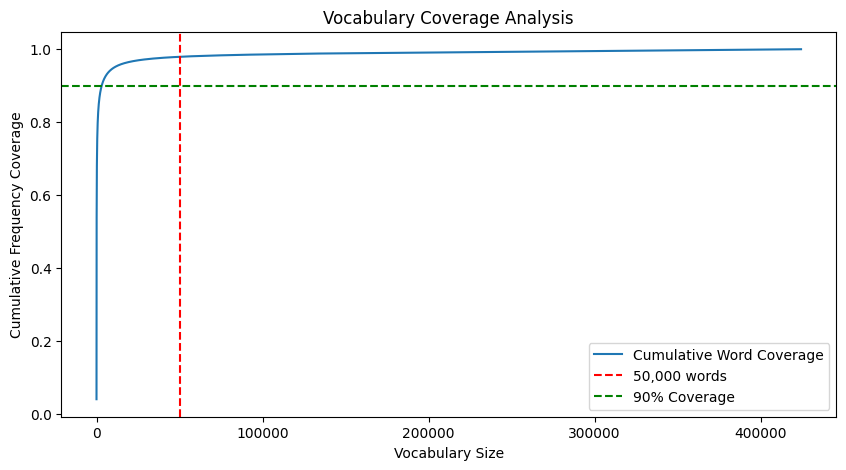

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# 获取所有词汇的频率，并按出现次数降序排序
word_freqs = sorted(counter.values(), reverse=True)

# 计算累积覆盖率
total_words = sum(word_freqs)  # 总词频
cumulative_freqs = np.cumsum(word_freqs) / total_words  # 计算累计覆盖率

# 绘制词频累积分布图
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(word_freqs) + 1), cumulative_freqs, label="Cumulative Word Coverage")
plt.axvline(50000, color='r', linestyle='dashed', label="50,000 words")
plt.axhline(0.9, color='g', linestyle='dashed', label="90% Coverage")
plt.xlabel("Vocabulary Size")
plt.ylabel("Cumulative Frequency Coverage")
plt.legend()
plt.title("Vocabulary Coverage Analysis")
plt.show()